# `fitgrid` demo

In [1]:
import fitgrid
%matplotlib inline

Here are the defaults we are using (current Kutas Lab defaults):

## 1. Read in the epochs

Single subject demonstration experiment at Kutas Lab.

In [2]:
epochs = fitgrid.epochs_from_hdf(
    '../tests/data/sub000wr.epochs.h5',
    key='wr',
    epoch_id='Epoch_idx',
    time='Time',
    channels=['MiPf', 'MiCe', 'MiPa', 'MiOc']
)


### 1.1 Quick peek at the data

In [3]:
epochs.table.head()

,Time,Index,anchor_code,anchor_str,anchor_tick,anchor_tick_delta,category,congruity,crw_ticks,data_group,...,RMOc,LLTe,RLTe,LLOc,RLOc,MiOc,A2,HEOG,rle,rhz
Epoch_idx,,,,,,,,,,,,,,,,,,,,,
0,-100,0,8010,8010,266277,0,A form of government,incongruent,266252,sub000,...,4.425781,-14.320312,0.986816,-7.949219,14.265625,8.500000,2.953125,0.000000,-5.851562,1.457031
0,-96,0,8010,8010,266277,0,A form of government,incongruent,266253,sub000,...,8.851562,-15.328125,-1.233398,-3.478516,16.968750,13.359375,2.214844,2.203125,-2.437500,1.457031
0,-92,0,8010,8010,266277,0,A form of government,incongruent,266254,sub000,...,12.054688,-13.312500,0.000000,0.993652,17.703125,14.335938,1.722656,0.979004,-8.289062,-3.886719
0,-88,0,8010,8010,266277,0,A form of government,incongruent,266255,sub000,...,13.531250,-11.054688,-2.466797,3.974609,16.968750,17.000000,-4.921875,3.425781,-10.726562,-6.800781
0,-84,0,8010,8010,266277,0,A form of government,incongruent,266256,sub000,...,11.070312,-11.554688,-7.648438,2.236328,12.296875,10.687500,-6.890625,3.181641,-16.578125,-9.718750


### 1.2 Plot simple grand mean averages

Negative up is the default, but we use it here to show it's available:

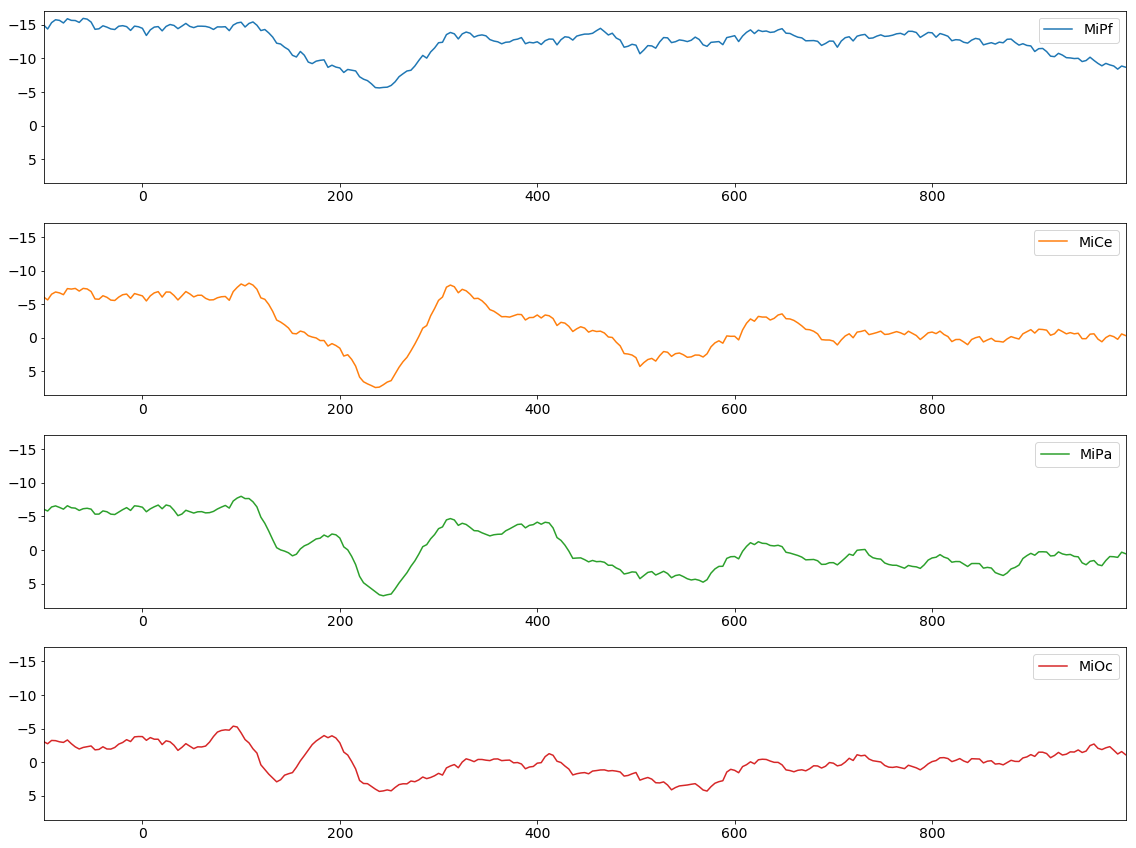

In [4]:
_ = epochs.plot_averages(negative_up=True)

## 2. Run simple linear regression on `congruity`

In [5]:
lm_grid = fitgrid.lm(epochs, RHS='congruity')

100%|██████████| 275/275 [00:07<00:00, 39.06it/s]


### 2.1 Plot betas

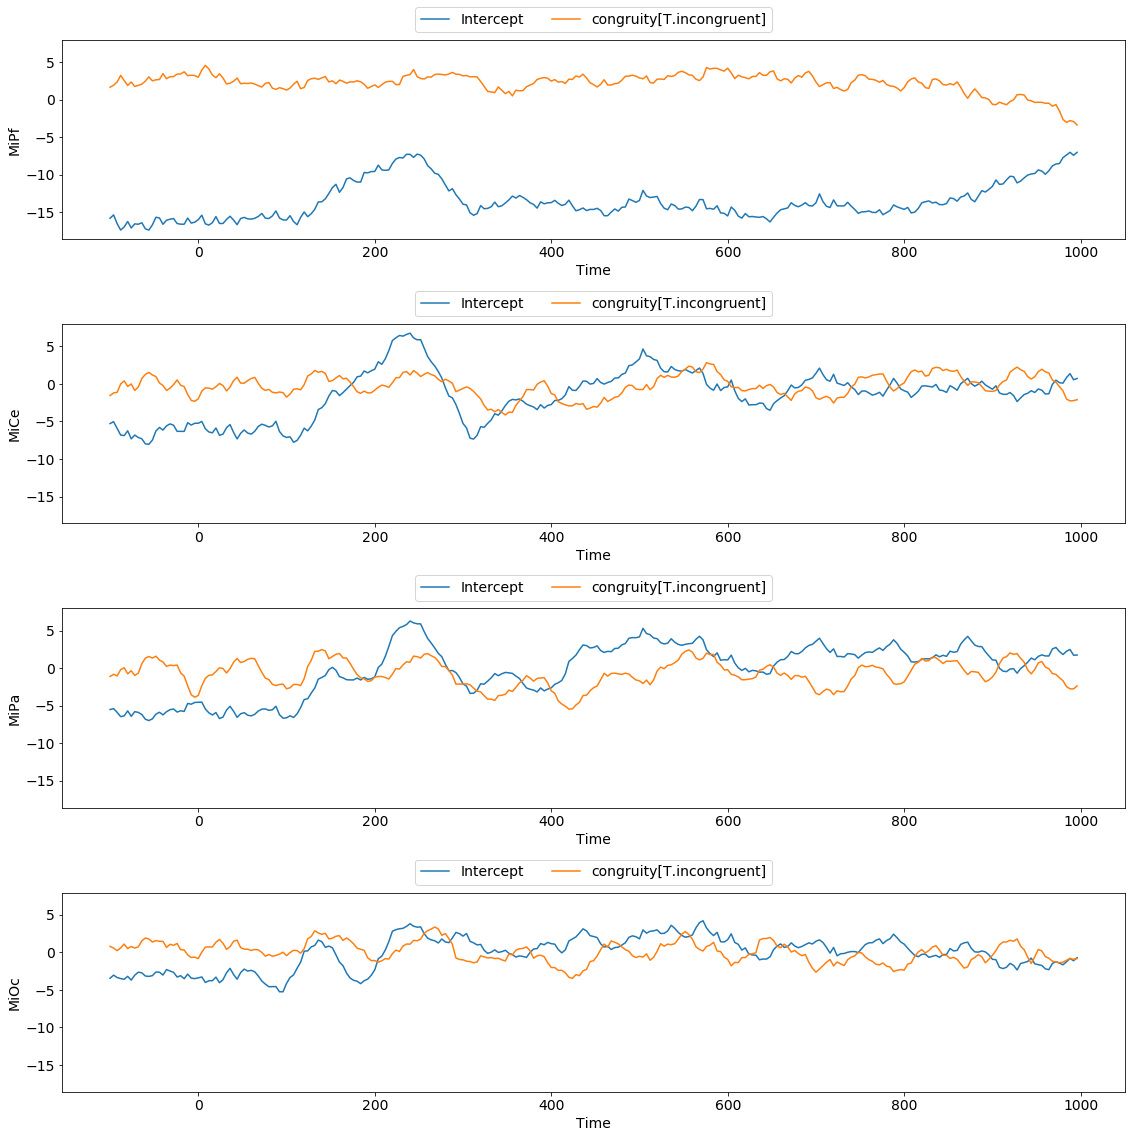

In [6]:
_ = lm_grid.plot_betas()

### 2.2 Plot adjusted $R^2$

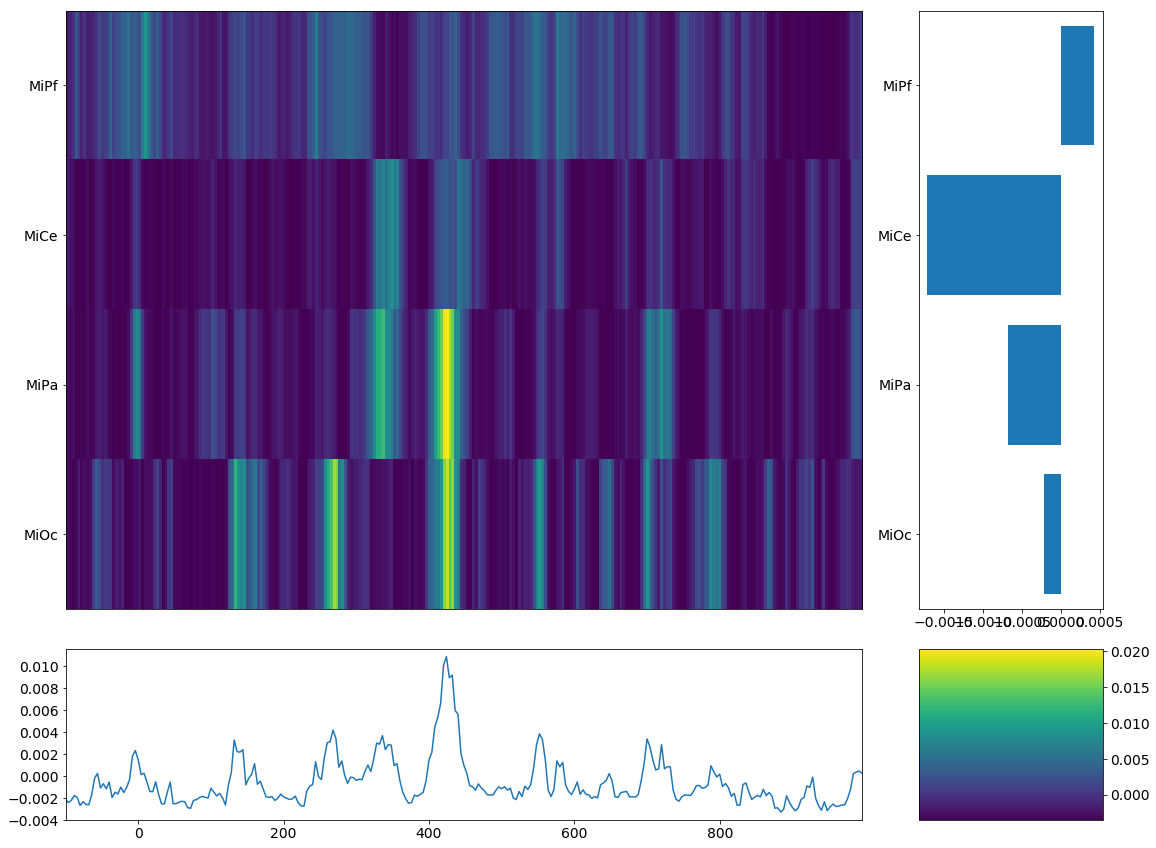

In [7]:
_ = lm_grid.plot_adj_rsquared()

### 2.3 Access diagnostics

In [8]:
pvalues = lm_grid.pvalues

In [9]:
tvalues = lm_grid.tvalues

In [10]:
rsquared_adj = lm_grid.rsquared_adj

# Epochs from a dataframe

In [11]:
import pandas as pd

idx_cols = ['Epoch_idx', 'Time']
lhs_cols = ['MiPf', 'MiCe', 'MiPa', 'MiOc']
rhs_cols = ['idx'] 

epochs_df = (
    pd.read_hdf('../tests/data/sub000wr.epochs.h5', key='wr')
    .loc[:, idx_cols + lhs_cols + rhs_cols]
    .set_index(['Epoch_idx', 'Time'], append=True)
)

# Fit LMER

In [12]:
lmer_grid = fitgrid.lmer(
    fitgrid.epochs_from_dataframe(
        epochs_df,
        time='Time',
        epoch_id='Epoch_idx',
        channels=lhs_cols
    ),
    RHS = "1 + (1 | idx)",
    LHS = lhs_cols
)

  0%|          | 0/275 [00:00<?, ?it/s]/home/turbach/.conda/envs/fitgrid_dev/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
100%|██████████| 275/275 [12:53<00:00,  3.00s/it]


# See what's available in the LMER grid

Not everything is fully implemented

In [13]:
dir(lmer_grid)

['AIC',
 '_REML',
 '_conf_int',
 '_make_factors',
 '_permute',
 '_refit_orthogonal',
 'anova',
 'coefs',
 'factors',
 'factors_prev_',
 'family',
 'fit',
 'fits',
 'fitted',
 'fixef',
 'formula',
 'grps',
 'has_warning',
 'logLike',
 'marginal_contrasts',
 'marginal_estimates',
 'plot',
 'plot_summary',
 'post_hoc',
 'predict',
 'ranef',
 'ranef_corr',
 'ranef_var',
 'resid',
 'save',
 'sig_type',
 'simulate',
 'summary',
 'warning',
 'warnings']

In [14]:
-2 * lmer_grid.logLike

,MiPf,MiCe,MiPa,MiOc
Time,,,,
-100,2536.414850,2471.318872,2469.826557,2285.498253
-96,2539.852654,2490.562126,2481.973029,2294.373932
-92,2542.086383,2486.489679,2481.269585,2285.843590
-88,2542.628112,2479.276322,2475.453334,2286.998378
-84,2531.346854,2460.998662,2465.016718,2266.686709
-80,2524.749147,2472.198967,2473.422182,2254.244120
-76,2532.009640,2474.156040,2473.684965,2240.643752
-72,2549.482992,2472.199660,2469.366029,2246.913954
-68,2549.214462,2460.209850,2458.206462,2250.552701


In [15]:
lmer_grid.coefs

MiPf         MiCe         MiPa         MiOc
Time                                                                         
-100 (Intercept) Estimate     -14.9653     -6.06596     -6.07264     -3.06109
                 2.5_ci       -17.3188     -8.11644     -8.11779      -4.5445
                 97.5_ci      -12.6118     -4.01548     -4.02748     -1.57768
                 SE            1.20078      1.04618      1.04347     0.756858
                 DF                143          287          287          287
                 T-stat        -12.463     -5.79818     -5.81967     -4.04447
                 P-val     1.34475e-24  1.76581e-08  1.57424e-08  6.74511e-05
                 Sig               ***          ***          ***          ***
-96  (Intercept) Estimate     -14.3767      -5.6365     -5.80687      -2.7537
                 2.5_ci       -16.7464     -7.75689     -7.89577     -4.26023
                 97.5_ci      -12.0071     -3.51611     -3.71797     -1.24717
                 SE            1.20904      1.08185      1.06578     0.768652
                 DF                143          287          287          287
                 T-stat        -11.891     -5.21005     -5.44845      -3.5825
                 P-val     4.20049e-23  3.61114e-07  1.09411e-07  0.000399643
                 Sig               ***          ***          ***          ***
-92  (Intercept) Estimate     -15.3229     -6.48833     -6.40865     -3.24399
                 2.5_ci       -17.7096     -8.59372     -8.49499     -4.73268
                 97.5_ci      -12.9362     -4.38293     -4.32231     -1.75531
                 SE            1.21773       1.0742      1.06448     0.759547
                 DF                143          287          287          143
                 T-stat       -12.5832     -6.04013     -6.02046     -4.27096
                 P-val     6.52946e-25  4.76127e-09  5.30431e-09  3.53008e-05
                 Sig               ***          ***          ***          ***
-88  (Intercept) Estimate       -15.75      -6.8184     -6.56754     -3.21188
                 2.5_ci       -18.1574      -8.8975     -8.63284     -4.70833
                 97.5_ci      -13.3426     -4.73929     -4.50223     -1.71542
                 SE            1.22829      1.06079      1.05375      0.76351
                 DF                143          287          287          143
                 T-stat       -12.8227     -6.42767     -6.23256     -4.20672
...                                ...          ...          ...          ...
 984 (Intercept) 97.5_ci      -5.98327      1.70622      2.95792    -0.288717
                 SE            1.47274     0.957589     0.999627     0.765856
                 DF                287          287          143          143
                 T-stat       -6.02265    -0.178174     0.999057     -2.33695
                 P-val     5.24114e-09     0.858712     0.319455    0.0208297
                 Sig               ***                                      *
 988 (Intercept) Estimate     -8.39931     0.223914      1.09357      -1.2248
                 2.5_ci       -11.3176     -1.72816    -0.949679      -2.7002
                 97.5_ci        -5.481      2.17599      3.13681     0.250597
                 SE            1.48896     0.995976      1.04249     0.752767
                 DF                143          143          143          143
                 T-stat       -5.64106     0.224819      1.04899     -1.62706
                 P-val     8.74728e-08     0.822441     0.295951     0.105925
                 Sig               ***                                       
 992 (Intercept) Estimate     -8.86458    -0.572662     0.324593     -1.58488
                 2.5_ci       -11.8889      -2.5473     -1.71941     -3.01462
                 97.5_ci      -5.84028      1.40197      2.36859     -0.15514
                 SE            1.54304      1.00748      1.04288     0.729473
                 DF                143          143     

In [16]:
lmer_grid.coefs

MiPf         MiCe         MiPa         MiOc
Time                                                                         
-100 (Intercept) Estimate     -14.9653     -6.06596     -6.07264     -3.06109
                 2.5_ci       -17.3188     -8.11644     -8.11779      -4.5445
                 97.5_ci      -12.6118     -4.01548     -4.02748     -1.57768
                 SE            1.20078      1.04618      1.04347     0.756858
                 DF                143          287          287          287
                 T-stat        -12.463     -5.79818     -5.81967     -4.04447
                 P-val     1.34475e-24  1.76581e-08  1.57424e-08  6.74511e-05
                 Sig               ***          ***          ***          ***
-96  (Intercept) Estimate     -14.3767      -5.6365     -5.80687      -2.7537
                 2.5_ci       -16.7464     -7.75689     -7.89577     -4.26023
                 97.5_ci      -12.0071     -3.51611     -3.71797     -1.24717
                 SE            1.20904      1.08185      1.06578     0.768652
                 DF                143          287          287          287
                 T-stat        -11.891     -5.21005     -5.44845      -3.5825
                 P-val     4.20049e-23  3.61114e-07  1.09411e-07  0.000399643
                 Sig               ***          ***          ***          ***
-92  (Intercept) Estimate     -15.3229     -6.48833     -6.40865     -3.24399
                 2.5_ci       -17.7096     -8.59372     -8.49499     -4.73268
                 97.5_ci      -12.9362     -4.38293     -4.32231     -1.75531
                 SE            1.21773       1.0742      1.06448     0.759547
                 DF                143          287          287          143
                 T-stat       -12.5832     -6.04013     -6.02046     -4.27096
                 P-val     6.52946e-25  4.76127e-09  5.30431e-09  3.53008e-05
                 Sig               ***          ***          ***          ***
-88  (Intercept) Estimate       -15.75      -6.8184     -6.56754     -3.21188
                 2.5_ci       -18.1574      -8.8975     -8.63284     -4.70833
                 97.5_ci      -13.3426     -4.73929     -4.50223     -1.71542
                 SE            1.22829      1.06079      1.05375      0.76351
                 DF                143          287          287          143
                 T-stat       -12.8227     -6.42767     -6.23256     -4.20672
...                                ...          ...          ...          ...
 984 (Intercept) 97.5_ci      -5.98327      1.70622      2.95792    -0.288717
                 SE            1.47274     0.957589     0.999627     0.765856
                 DF                287          287          143          143
                 T-stat       -6.02265    -0.178174     0.999057     -2.33695
                 P-val     5.24114e-09     0.858712     0.319455    0.0208297
                 Sig               ***                                      *
 988 (Intercept) Estimate     -8.39931     0.223914      1.09357      -1.2248
                 2.5_ci       -11.3176     -1.72816    -0.949679      -2.7002
                 97.5_ci        -5.481      2.17599      3.13681     0.250597
                 SE            1.48896     0.995976      1.04249     0.752767
                 DF                143          143          143          143
                 T-stat       -5.64106     0.224819      1.04899     -1.62706
                 P-val     8.74728e-08     0.822441     0.295951     0.105925
                 Sig               ***                                       
 992 (Intercept) Estimate     -8.86458    -0.572662     0.324593     -1.58488
                 2.5_ci       -11.8889      -2.5473     -1.71941     -3.01462
                 97.5_ci      -5.84028      1.40197      2.36859     -0.15514
                 SE            1.54304      1.00748      1.04288     0.729473
                 DF                143          143     